In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from owi_data_2_pandas.io import API
import datetime
from pytz import utc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.dates as mdates
import pytz

# sklearn imports
from sklearn.model_selection import train_test_split

# oma_tracking imports
from oma_tracking.data.preprocessing import sin_cos_angle_inputs

# Import vub Meetenet Vlaamse Banken API functions
from vubmvbc.config import Credentials
from vubmvbc.client import Base
from vubmvbc.objects import Catalog, Data
import vubmvbc.data_getter as dg

from oma_tracking.oma_clustering import ModeClusterer  #pip install hdbscan --no-build-isolation --no-binary :all
from oma_tracking.data.make_dataset import DatasetGetter
from oma_tracking.data.utils import unpack_mode, get_frequencies, get_rated_data, get_parked_data, read_simulations_csv_files

from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
user = os.getenv('API_USERNAME') 
password = os.getenv('API_PASSWORD')
root = r"http://10.0.0.138/api/v1/"
owi = API(api_root=root, username=user, password=password)
locations = owi.groups['locations'][4]
owi.groups

ConnectionError: HTTPConnectionPool(host='10.0.0.138', port=80): Max retries exceeded with url: /api/v1/mygroups (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025ECEAB6310>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
locations[10:11]

['nw2c02']

Location:  nw2e01 name_location:  NW2_E01
Loading data from local source
0:	learn: -2.4078563	total: 153ms	remaining: 15.1s
1:	learn: -2.4297995	total: 160ms	remaining: 7.84s
2:	learn: -2.4519113	total: 166ms	remaining: 5.38s
3:	learn: -2.4671282	total: 173ms	remaining: 4.15s
4:	learn: -2.4852145	total: 181ms	remaining: 3.43s
5:	learn: -2.5036296	total: 188ms	remaining: 2.95s
6:	learn: -2.5199003	total: 194ms	remaining: 2.58s
7:	learn: -2.5356454	total: 200ms	remaining: 2.31s
8:	learn: -2.5547814	total: 207ms	remaining: 2.1s
9:	learn: -2.5695009	total: 213ms	remaining: 1.92s
10:	learn: -2.5854102	total: 220ms	remaining: 1.78s
11:	learn: -2.5947395	total: 226ms	remaining: 1.66s
12:	learn: -2.6021602	total: 233ms	remaining: 1.56s
13:	learn: -2.6144553	total: 240ms	remaining: 1.47s
14:	learn: -2.6252741	total: 246ms	remaining: 1.4s
15:	learn: -2.6370859	total: 256ms	remaining: 1.34s
16:	learn: -2.6512606	total: 264ms	remaining: 1.29s
17:	learn: -2.6635677	total: 271ms	remaining: 1.24s
18:

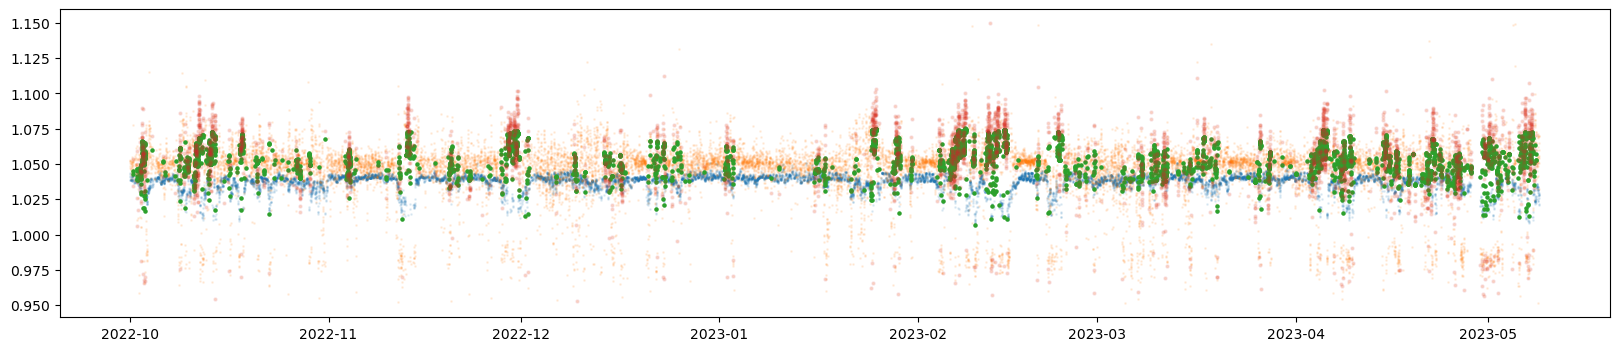

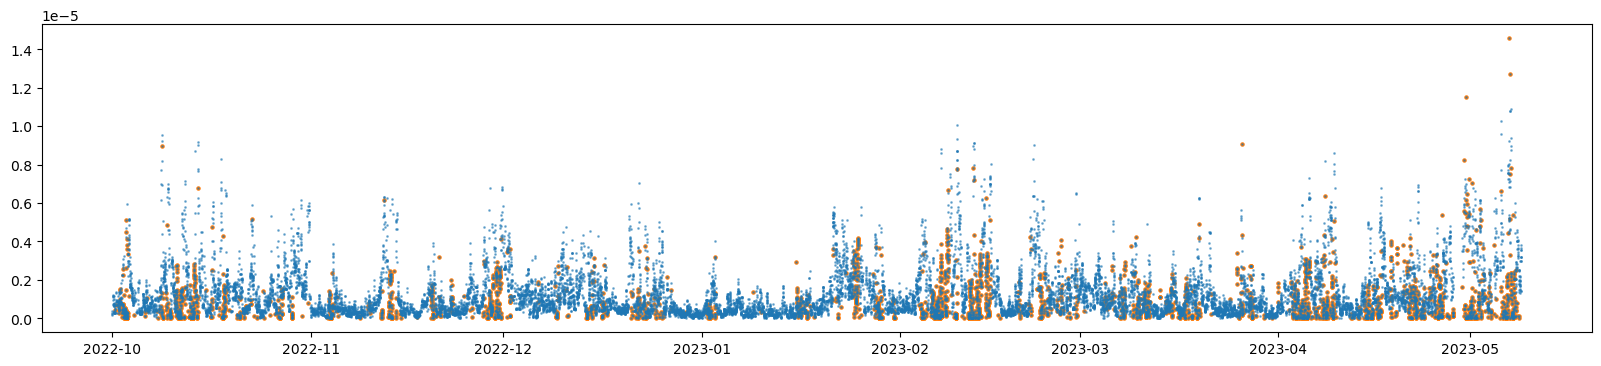

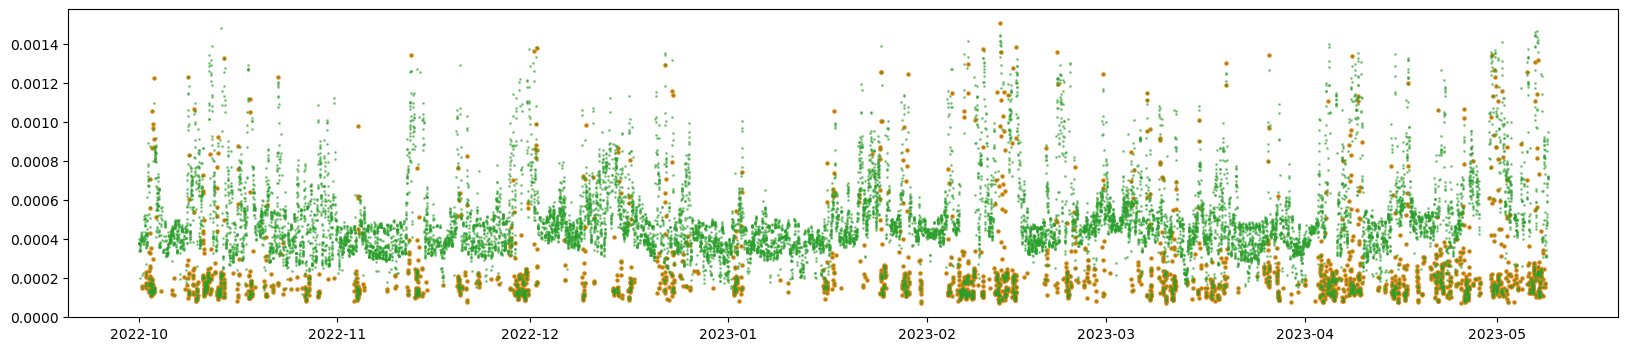

Test data plots


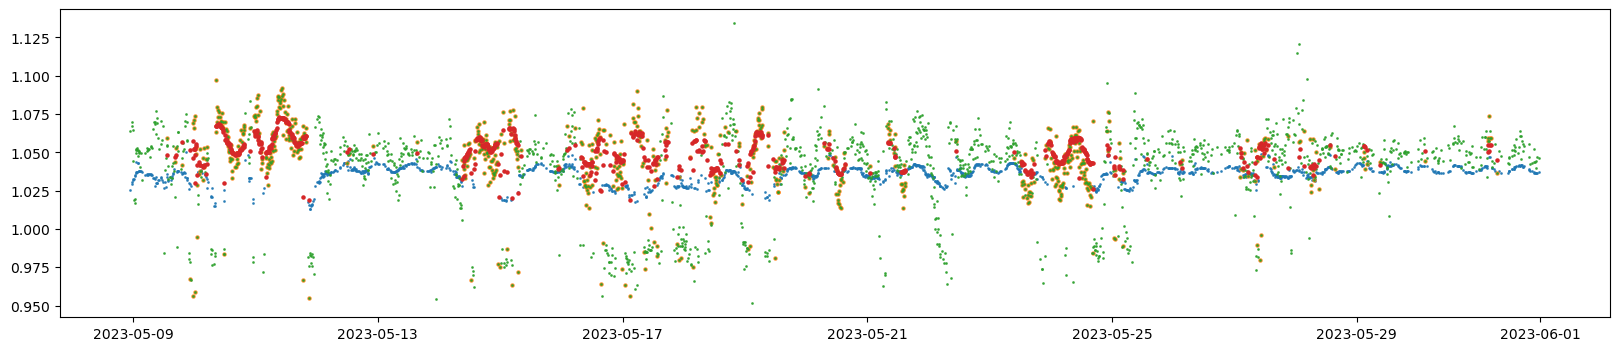

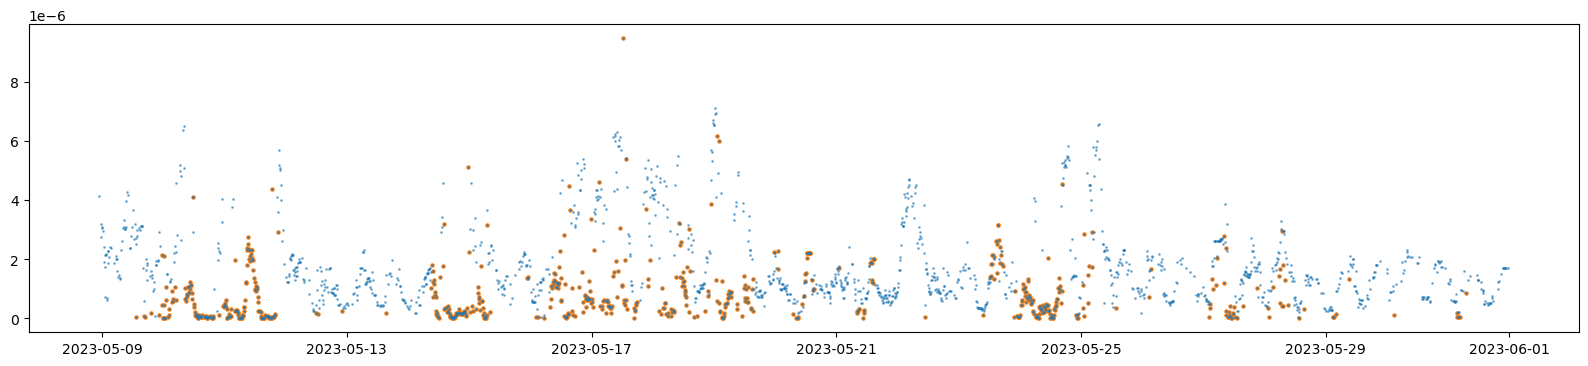

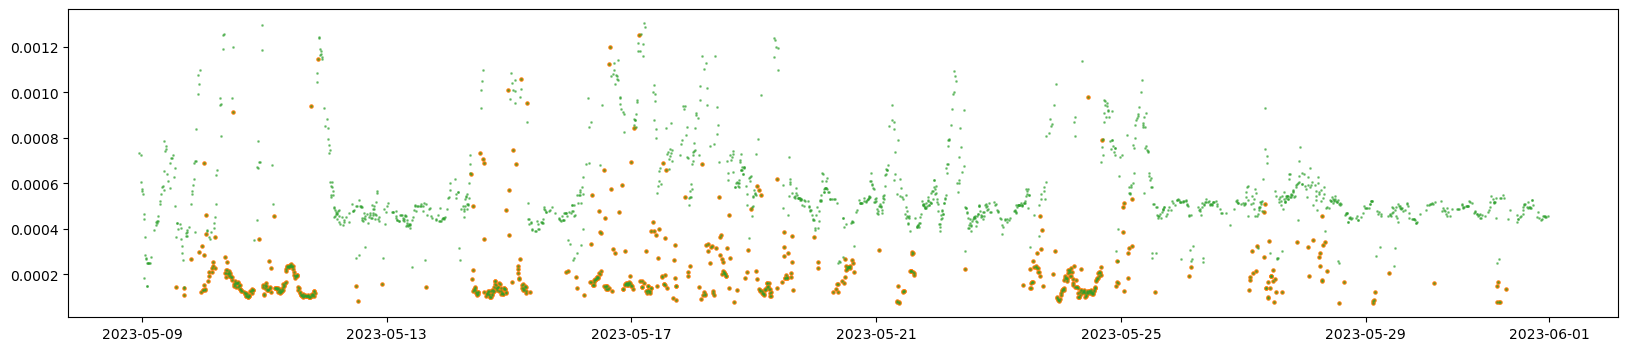

Location:  nw2f01 name_location:  NW2_F01
Loading data from local source
0:	learn: -2.8352069	total: 5.81ms	remaining: 575ms
1:	learn: -2.8595694	total: 11.4ms	remaining: 556ms
2:	learn: -2.8815443	total: 17.3ms	remaining: 560ms
3:	learn: -2.8967908	total: 22.3ms	remaining: 536ms
4:	learn: -2.9137163	total: 27.6ms	remaining: 524ms
5:	learn: -2.9327541	total: 33ms	remaining: 516ms
6:	learn: -2.9462394	total: 37.8ms	remaining: 503ms
7:	learn: -2.9576344	total: 43.2ms	remaining: 497ms
8:	learn: -2.9674848	total: 48.9ms	remaining: 495ms
9:	learn: -2.9735893	total: 53.7ms	remaining: 483ms
10:	learn: -2.9884451	total: 59ms	remaining: 477ms
11:	learn: -2.9926957	total: 64.8ms	remaining: 475ms
12:	learn: -3.0040069	total: 69.8ms	remaining: 467ms
13:	learn: -3.0140959	total: 75.2ms	remaining: 462ms
14:	learn: -3.0256980	total: 80.9ms	remaining: 459ms
15:	learn: -3.0414696	total: 87.3ms	remaining: 458ms
16:	learn: -3.0460945	total: 95.3ms	remaining: 465ms
17:	learn: -3.0498866	total: 103ms	remai

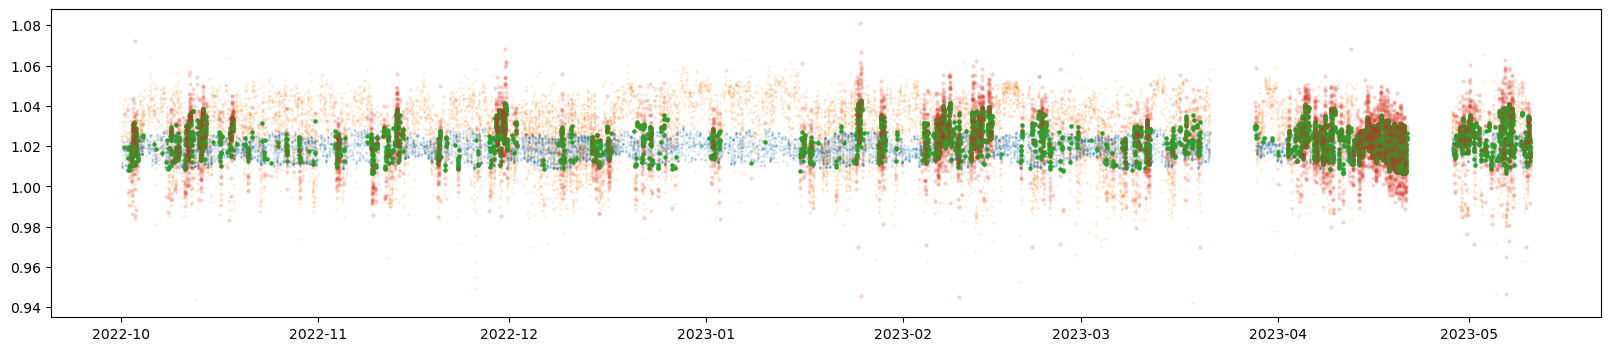

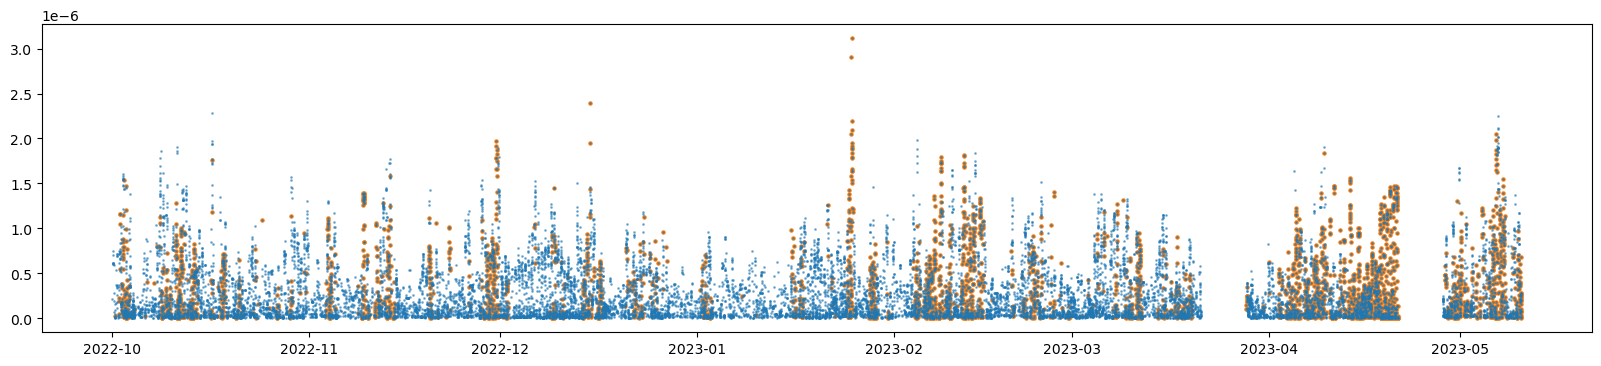

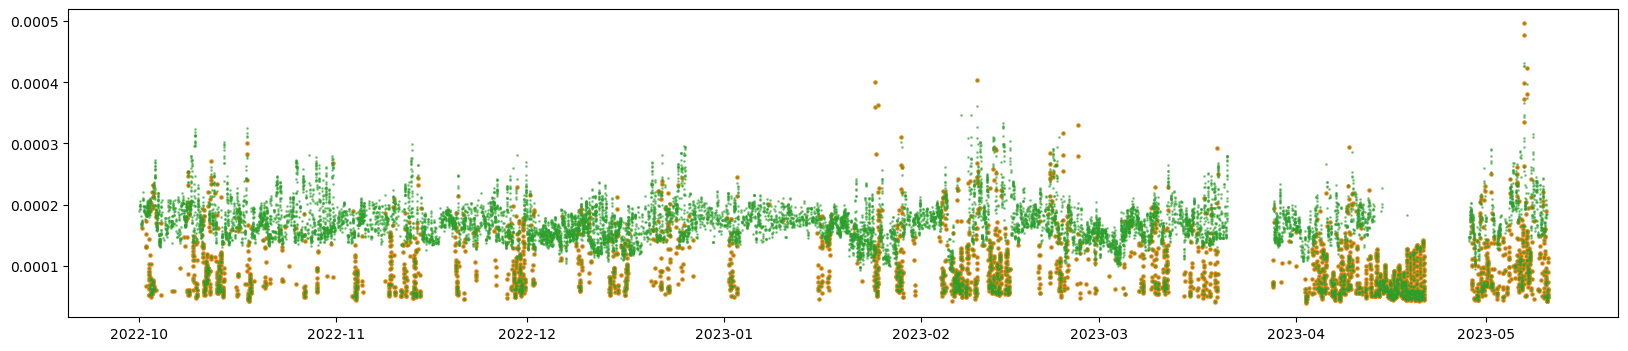

Test data plots


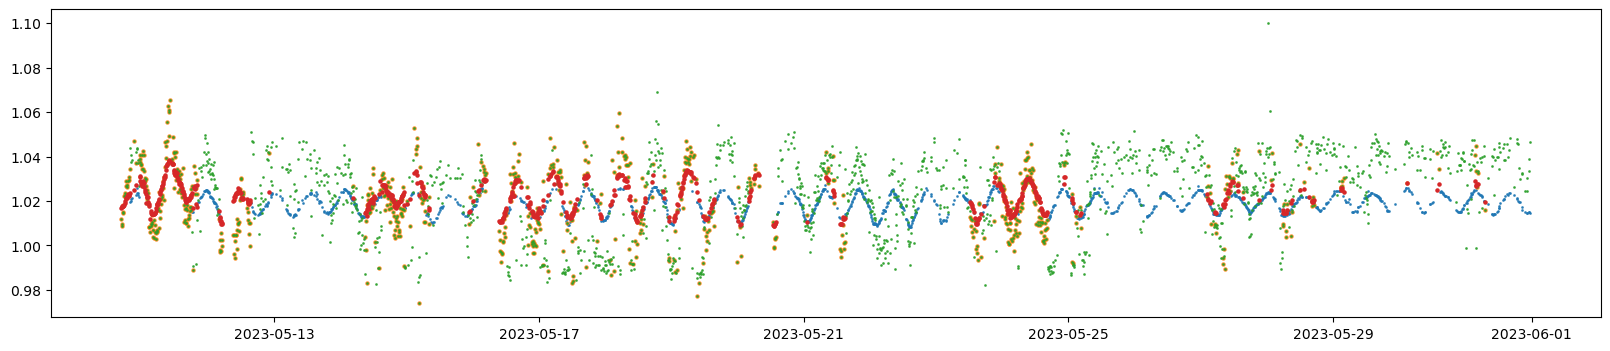

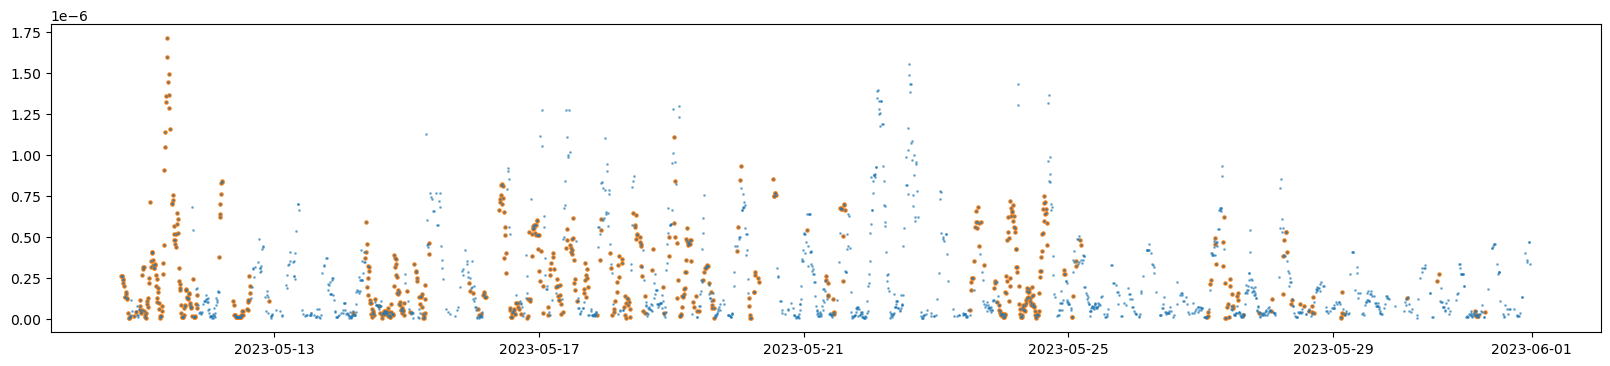

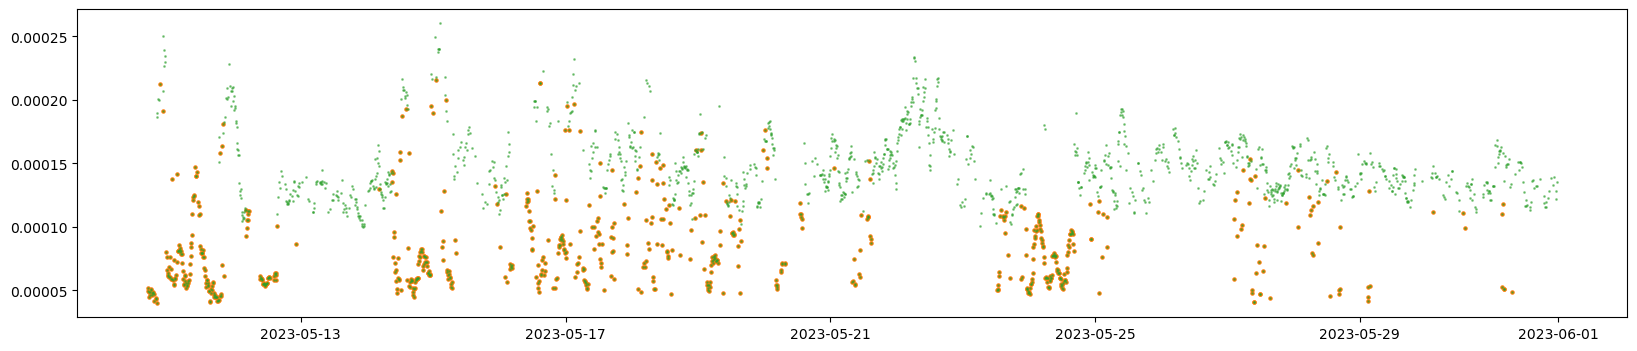

Location:  nw2d01 name_location:  NW2_D01
Loading data from local source
0:	learn: -2.4547633	total: 5.09ms	remaining: 504ms
1:	learn: -2.4837039	total: 9.79ms	remaining: 480ms
2:	learn: -2.5104650	total: 14.8ms	remaining: 480ms
3:	learn: -2.5335123	total: 19.6ms	remaining: 469ms
4:	learn: -2.5524652	total: 24.5ms	remaining: 465ms
5:	learn: -2.5718294	total: 29.8ms	remaining: 466ms
6:	learn: -2.5946076	total: 34.5ms	remaining: 458ms
7:	learn: -2.6094297	total: 39.4ms	remaining: 454ms
8:	learn: -2.6266380	total: 44ms	remaining: 445ms
9:	learn: -2.6450752	total: 49.1ms	remaining: 442ms
10:	learn: -2.6652059	total: 54.4ms	remaining: 440ms
11:	learn: -2.6813421	total: 59.2ms	remaining: 434ms
12:	learn: -2.6981942	total: 65.1ms	remaining: 436ms
13:	learn: -2.7131425	total: 70.9ms	remaining: 435ms
14:	learn: -2.7275172	total: 76.1ms	remaining: 431ms
15:	learn: -2.7413202	total: 81.3ms	remaining: 427ms
16:	learn: -2.7512308	total: 86.1ms	remaining: 420ms
17:	learn: -2.7639183	total: 90.8ms	re

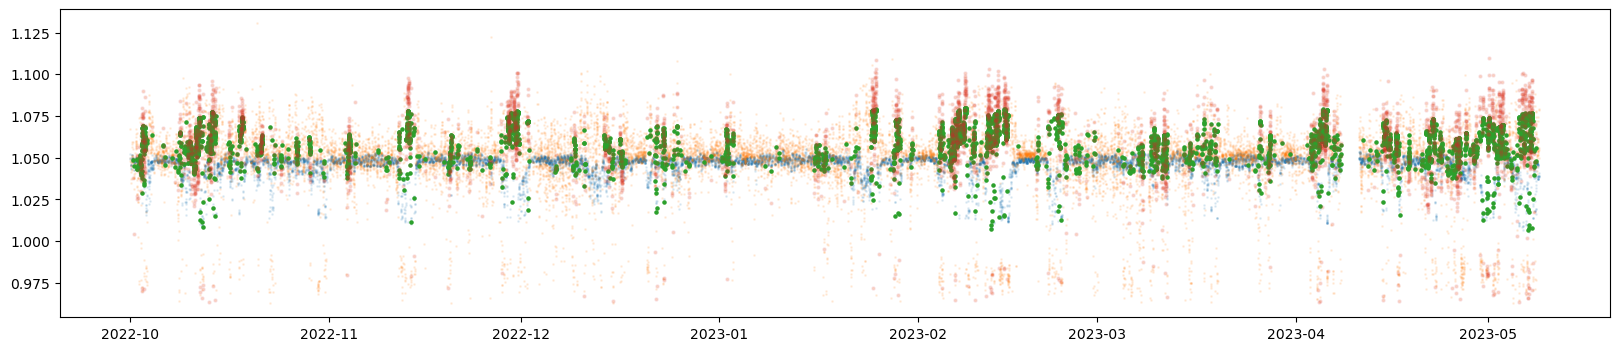

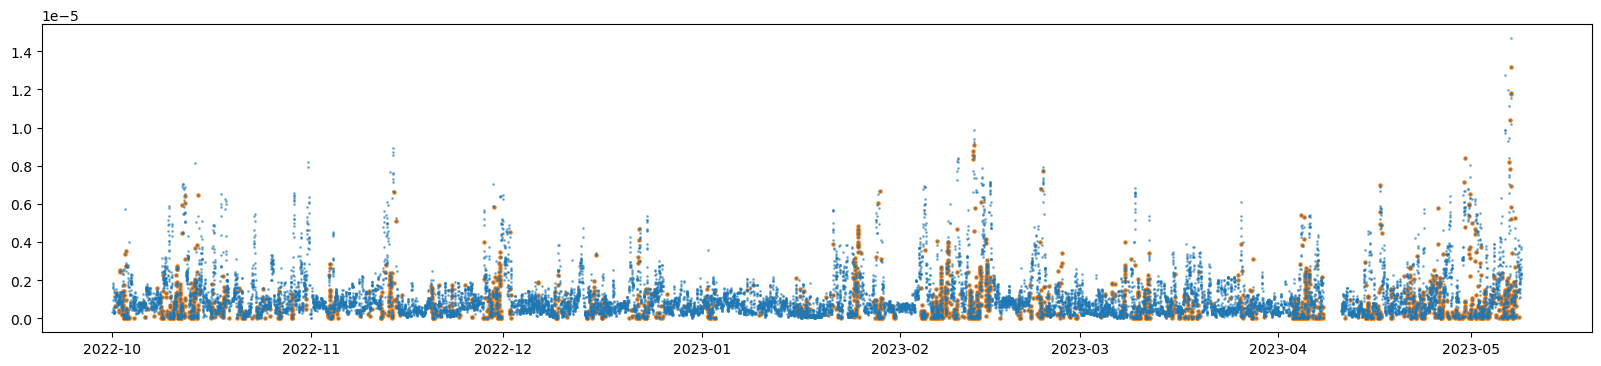

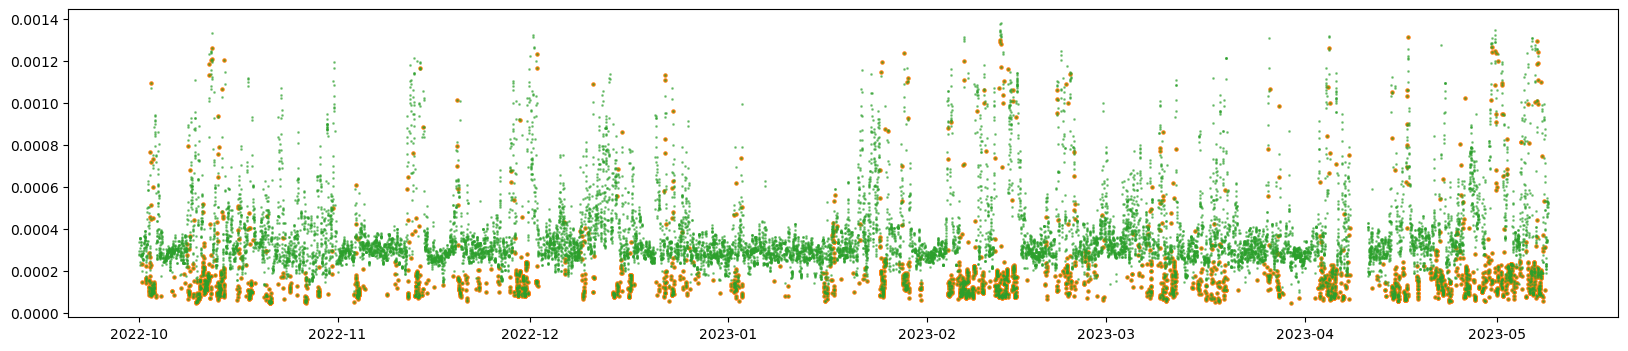

Test data plots


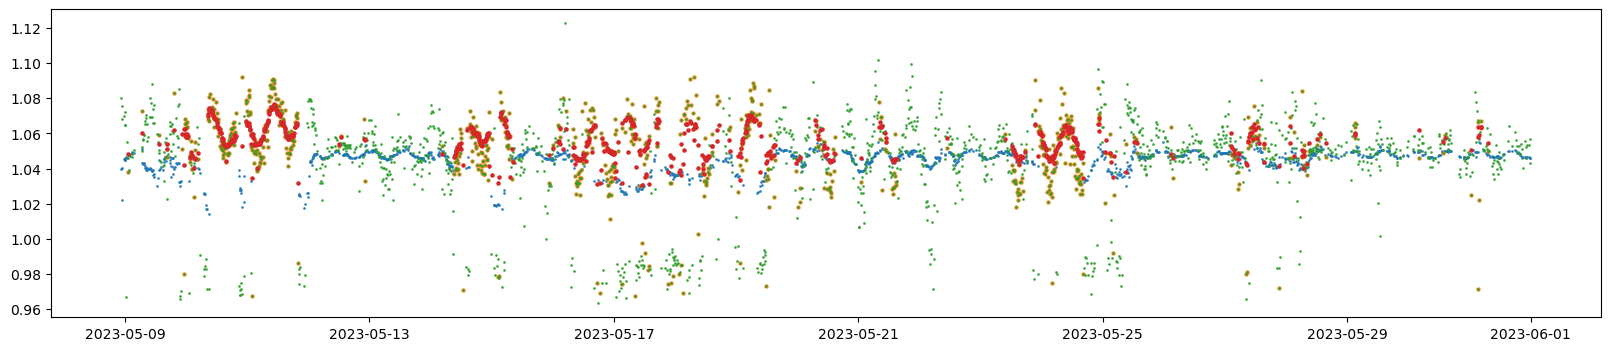

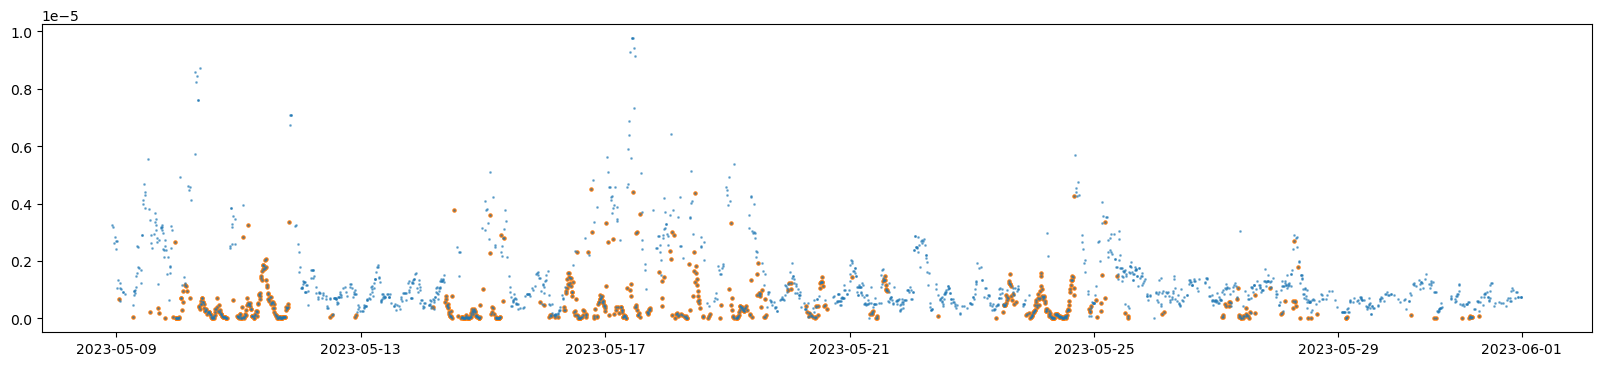

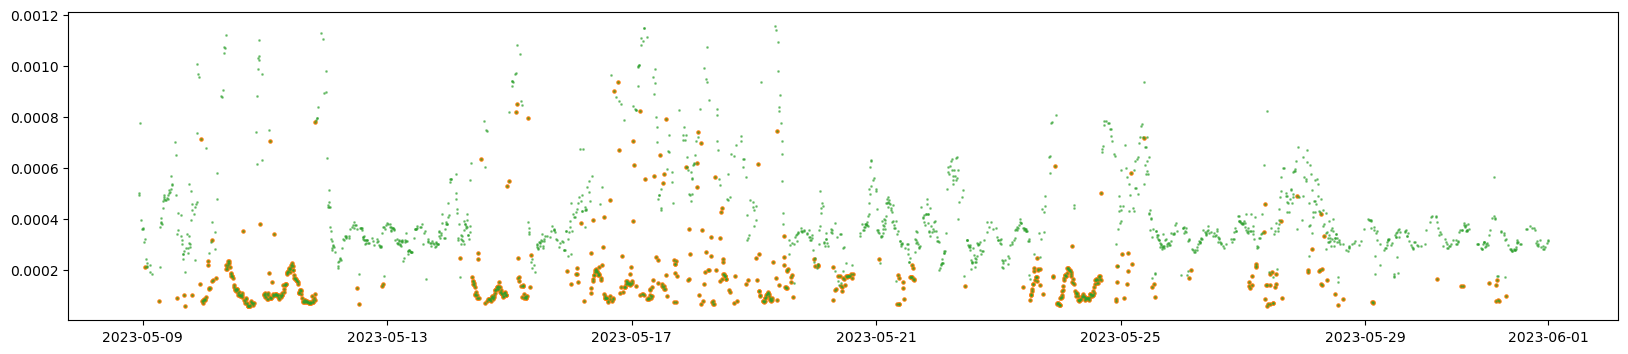

In [ ]:
start  = datetime.datetime(2022,10,1,tzinfo=utc)
stop  = datetime.datetime(2023,8,1,tzinfo=utc)

for location in locations[0:3]:
    name_location = '_'.join(['NW2', location.split('nw2')[1].upper()])
    home_folder = "../../"
    print("Location: ", location, "name_location: ", name_location)


    ### DATA HANDLING 
    ## Load turbine data
    try:
        # Load data from local source
        print("Loading data from local source")
        data_path = os.path.join(home_folder, "data", "nw2", "raw", location + ".parquet")
        turbine_data = pd.read_parquet(data_path)
    
    except:
        # Load data from API
        print("Loading data from API")
        dsg = DatasetGetter(start, stop, location)
        dsg.get_longterm_data()
        dsg.save_data(data_path)
        turbine_data = dsg.data

    ## Load weather station data
    weather_data_path = "../../data/nw2/mvbc_data.parquet"
    weather_station_data = pd.read_parquet(weather_data_path)

    ## Load the tracked modes   
    modes = ['SS2']
    tracked_modes_data = {}
    for mode in modes:
        mode_data_path = os.path.join(home_folder, "data", "nw2", "tracked_modes", "_".join([mode, location.upper()]) + ".parquet")
        tracked_modes_data[mode] = pd.read_parquet(mode_data_path)


    ### DATA PREPROCESSING

    ## Select the appropriate data frome the turbine data

    # The data is filtered to only include the mean values of the variables
    means_data = turbine_data.filter(regex = 'mean')
    # The data is filtered to remove the ACC data and only keep the SCADA
    means_SCADA_data = means_data.drop(columns = means_data.filter(regex = 'acc|ACC').columns)
    # The cyclic data and angles are transformed to sin and cos
    means_SCADA_data = sin_cos_angle_inputs(means_SCADA_data, angle_type = 'degrees', angles = ['winddirection', 'yaw'])
    # The data is filtered to only include variables with less than 5% missing values
    monitoring_inputs = means_SCADA_data.loc[:, means_SCADA_data.isna().sum() < 0.05 * means_SCADA_data.shape[0]]

    for mode in modes:
        tracked_mode = tracked_modes_data[mode]['frequency'].dropna()
        unique_tracked_mode = tracked_mode.groupby(tracked_mode.index).filter(lambda x: len(x) == 1)
        inputs_ = pd.concat([monitoring_inputs, weather_station_data], axis=1)
        # keep inputs with more than 75% of the data
        inputs = inputs_.loc[:, inputs_.isna().sum() < 0.25 * inputs_.shape[0]]
        y = unique_tracked_mode
        X = inputs.loc[y.index].dropna()
        X_parked = get_parked_data(X)
        y = y.loc[X.index]
        y_parked = y.loc[X_parked.index]

        # Split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
        X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=123)

        # Split the parked data into train and test
        X_train_parked, X_test_parked, y_train_parked, y_test_parked = train_test_split(X_parked, y_parked, test_size=0.1, shuffle=False)
        X_train_parked_, X_val_parked, y_train_parked_, y_val_parked = train_test_split(X_train_parked, y_train_parked, test_size=0.1, shuffle=True, random_state=123)

        rpm_split = 5

        X_lowrpm = X.loc[X.filter(regex = 'rpm')[X.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm = y.loc[X_lowrpm.index]

        X_lowrpm_train = X_train.loc[X_train.filter(regex = 'rpm')[X_train.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm_train = y_train.loc[X_lowrpm_train.index]
        X_lowrpm_test = X_test.loc[X_test.filter(regex = 'rpm')[X_test.filter(regex = 'rpm') < rpm_split].dropna().index]
        y_lowrpm_test = y_test.loc[X_lowrpm_test.index]

        cb_regr = CatBoostRegressor(iterations=100, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
        cb_regr.fit(X_lowrpm_train, y_lowrpm_train)


        inputs_ = X_train.dropna()
        targets_ = y_train

        preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

        mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
        knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        data = preds[:,2] # average estimated data uncertainty

        parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_train, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_train.index)

        parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
        parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        parked_data = parked_preds[:,2] # average estimated data uncertainty

        print('Train data plots')

        plt.figure(figsize=(20,4))
        plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
        plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
        plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)
        plt.scatter(y_lowrpm_train.index, y_lowrpm_train, label='parked', s=5, alpha=0.1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')
        plt.show()

        print('Test data plots')

        inputs_ = X_test.dropna()
        targets_ = y_test

        preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

        mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
        knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        data = preds[:,2] # average estimated data uncertainty

        parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_test, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
        parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_test.index)

        parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
        parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
        parked_data = parked_preds[:,2] # average estimated data uncertainty

        plt.figure(figsize=(20,4))
        plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.8)
        plt.scatter(y_lowrpm_test.index, y_lowrpm_test, label='parked', s=5, alpha=0.8)
        plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.8)
        plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)

        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
        plt.show()
        plt.figure(figsize=(20,4))
        plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
        plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

        plt.show()

        

    

In [ ]:
train_pool = Pool(X_train_parked, y_train_parked, feature_names=X_train.columns.tolist())
test_pool = Pool(X_test_parked, y_test_parked, feature_names=X_test.columns.tolist())

cb_regr = CatBoostRegressor(iterations=100)
summary = cb_regr.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select='0-17',
    num_features_to_select=9,
    steps=19,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Exact,
    train_final_model=True,
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The number of features selection steps (19) is greater than the number of features to eliminate (9). The number of steps was reduced to 9.


In [ ]:
summary['selected_features_names']

['mean_NW2_D01_rpm',
 'mean_NW2_D01_pitch',
 'mean_NW2_D01_power',
 'mvbc_WandelaarBuoy_10%_highest_waves',
 'mvbc_WandelaarBuoy_Wave_height',
 'mvbc_WandelaarBuoy_Average_wave_period',
 'mvbc_WandelaarBuoy_Height_waves_with_period_>_10_s',
 'mvbc_WandelaarMeasuringpile_Max_3-seconds_wind_gust_(at_10_m_height)',
 'mvbc_WandelaarMeasuringpile_Tide_TAW']

In [ ]:
cb_regr = CatBoostRegressor(iterations=100, random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
cb_regr.fit(X_lowrpm_train[summary['selected_features_names']], y_lowrpm_train)

0:	learn: -2.4563600	total: 4.45ms	remaining: 441ms
1:	learn: -2.4818238	total: 8.07ms	remaining: 395ms
2:	learn: -2.5101823	total: 11.9ms	remaining: 384ms
3:	learn: -2.5324508	total: 16.2ms	remaining: 389ms
4:	learn: -2.5545576	total: 20.4ms	remaining: 388ms
5:	learn: -2.5768103	total: 23.3ms	remaining: 366ms
6:	learn: -2.5961580	total: 26ms	remaining: 345ms
7:	learn: -2.6145125	total: 28.3ms	remaining: 325ms
8:	learn: -2.6321070	total: 30.5ms	remaining: 308ms
9:	learn: -2.6479579	total: 33.6ms	remaining: 303ms
10:	learn: -2.6651961	total: 37.2ms	remaining: 301ms
11:	learn: -2.6821287	total: 40.1ms	remaining: 294ms
12:	learn: -2.7000539	total: 43.4ms	remaining: 291ms
13:	learn: -2.7174436	total: 45.8ms	remaining: 281ms
14:	learn: -2.7303093	total: 49.2ms	remaining: 279ms
15:	learn: -2.7451185	total: 53.6ms	remaining: 282ms
16:	learn: -2.7593261	total: 57.2ms	remaining: 279ms
17:	learn: -2.7743332	total: 60.8ms	remaining: 277ms
18:	learn: -2.7848139	total: 64.2ms	remaining: 274ms
19:	l

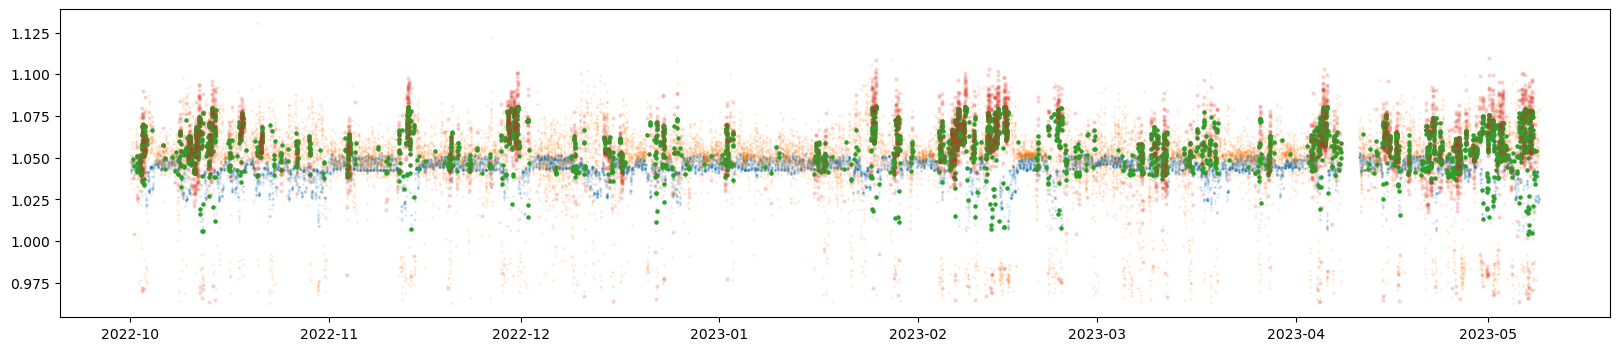

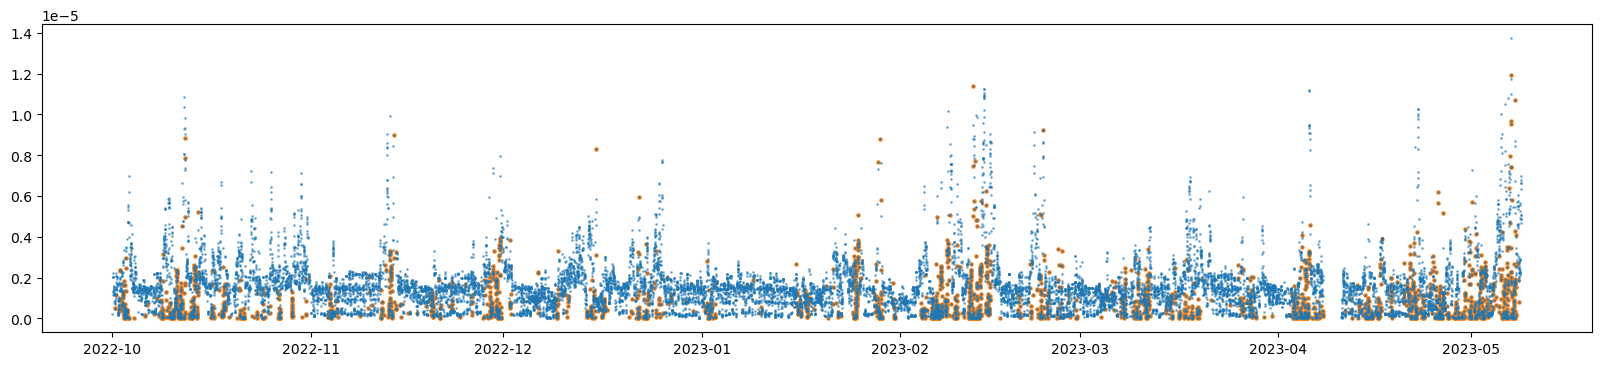

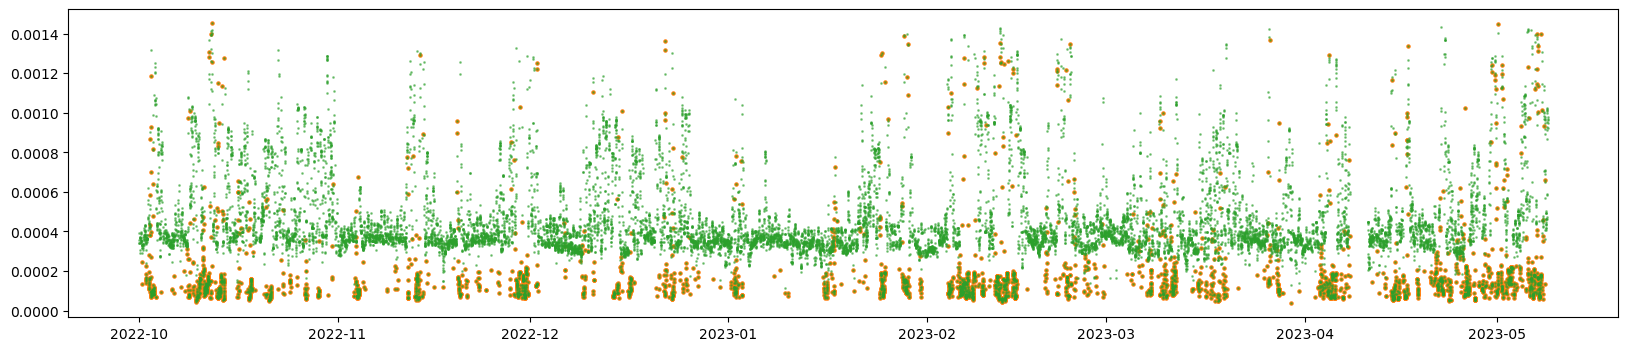

In [ ]:
inputs_ = X_train[summary['selected_features_names']].dropna()
targets_ = y_train

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_train, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_train.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

plt.figure(figsize=(20,4))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)
plt.scatter(y_lowrpm_train.index, y_lowrpm_train, label='parked', s=5, alpha=0.1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

plt.show()

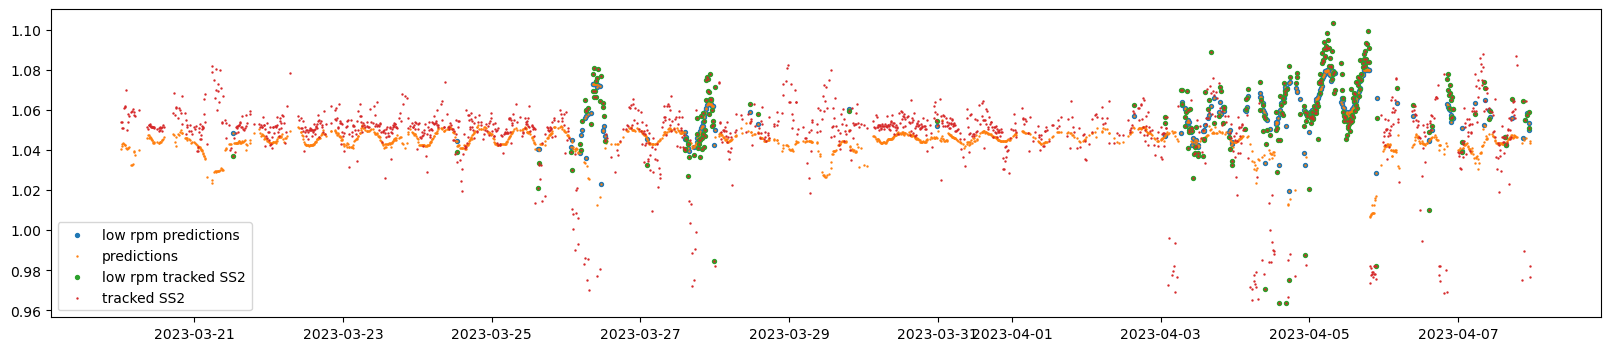

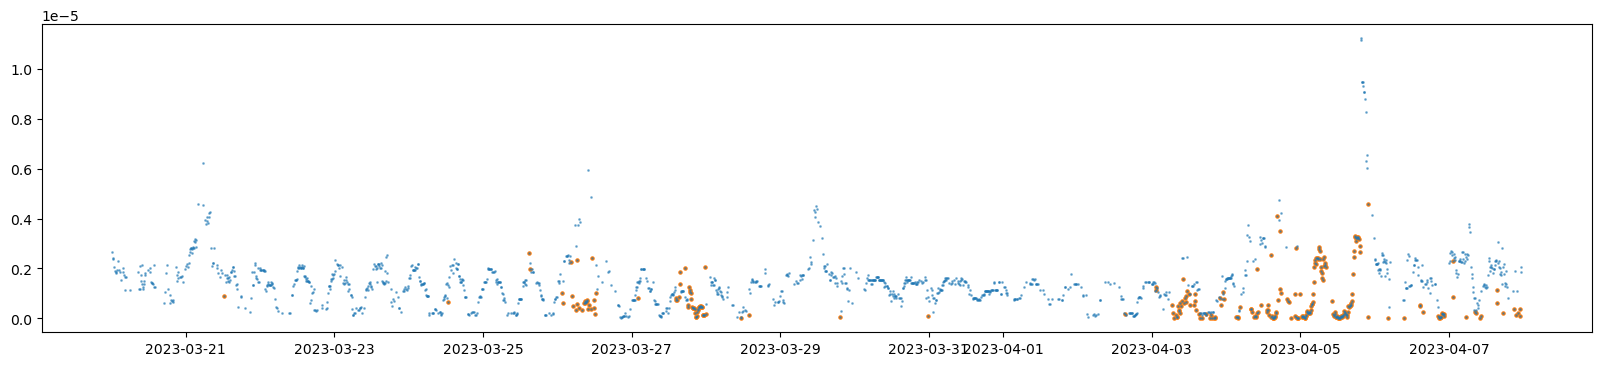

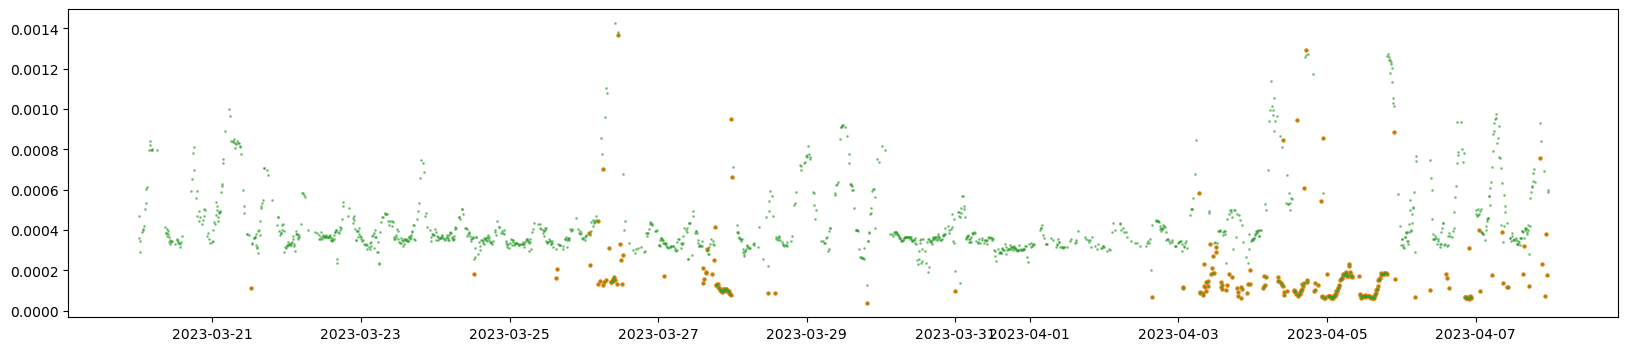

In [ ]:
import pytz
plt_start = datetime.datetime(2023, 3, 20, 0, 0, 0, tzinfo = pytz.UTC)
plt_end = plt_start + datetime.timedelta(days=20)

plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df.loc[plt_start:plt_end].index, parked_preds_df.loc[plt_start:plt_end]['mean'], label='low rpm predictions', s=8, alpha=1.0)
plt.scatter(inputs_.loc[plt_start:plt_end].index, preds_df.loc[plt_start:plt_end]['mean'], label='predictions', s=0.5, alpha=1.0)
plt.scatter(y_lowrpm.loc[plt_start:plt_end].index, y_lowrpm.loc[plt_start:plt_end], label='low rpm tracked SS2', s=8, alpha=1.0)
plt.scatter(targets_.loc[plt_start:plt_end].index, targets_.loc[plt_start:plt_end], label='tracked SS2', s=0.5, alpha=1.0)


plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].loc[plt_start:plt_end].index, parked_preds_df['knowledge'].loc[plt_start:plt_end],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].loc[plt_start:plt_end].index, preds_df['knowledge'].loc[plt_start:plt_end], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].loc[plt_start:plt_end].index, parked_preds_df['data'].loc[plt_start:plt_end], s=5, alpha=1.0, color='tab:orange', label='data uncertainty at low rpm')
plt.scatter(preds_df['data'].loc[plt_start:plt_end].index, preds_df['data'].loc[plt_start:plt_end],s=1, alpha=0.5, color='tab:green', label='data uncertainty')

plt.show()

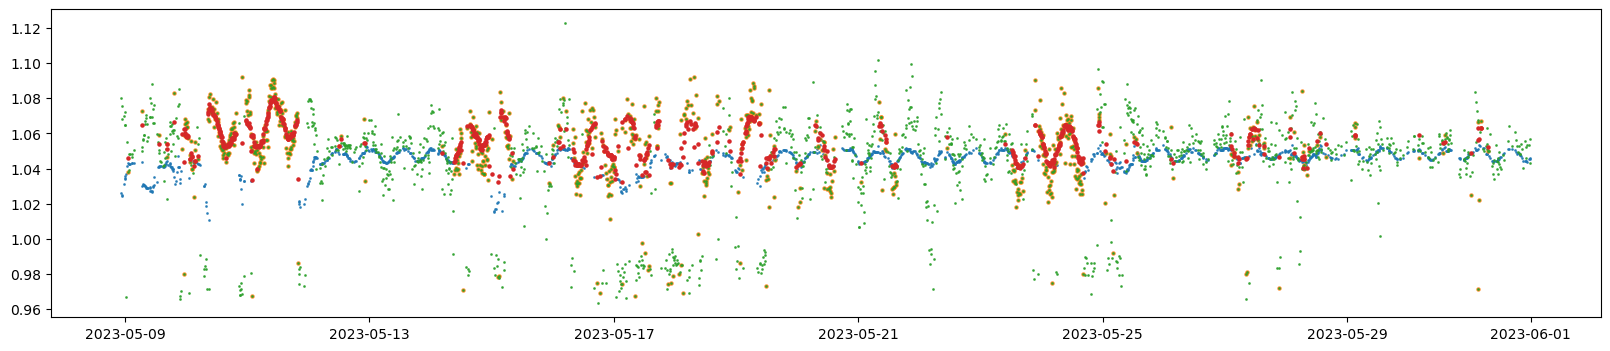

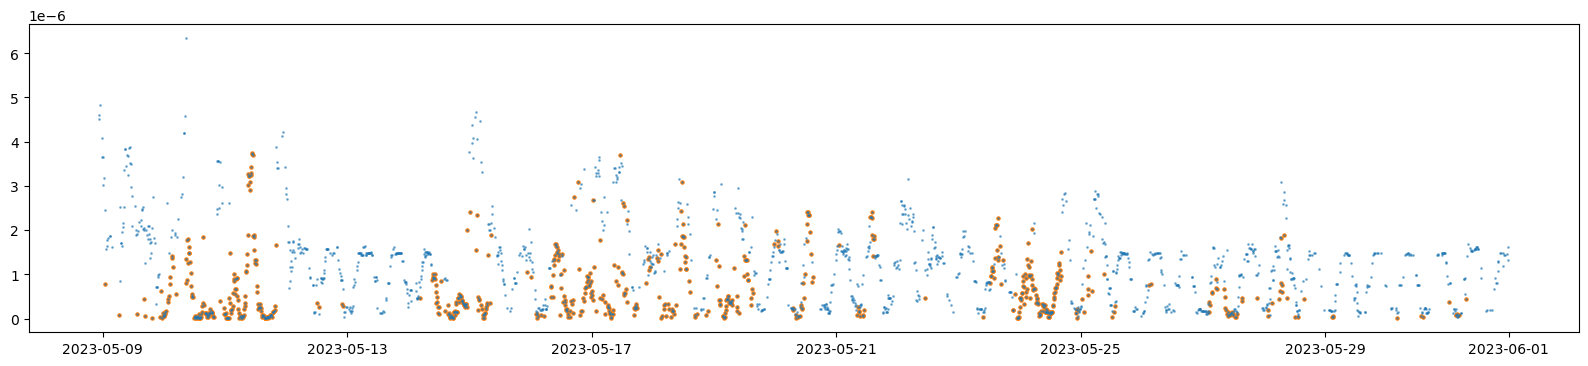

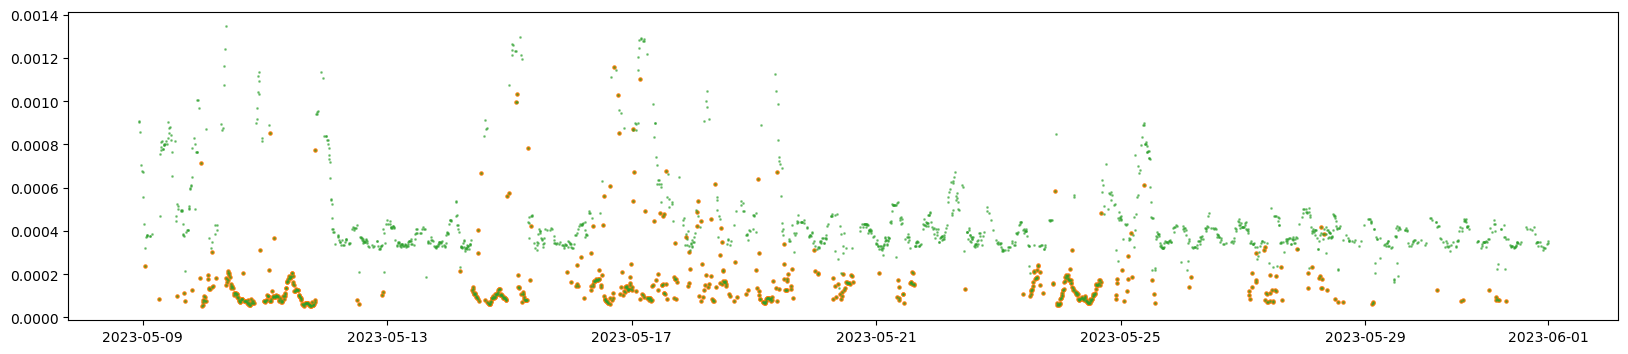

In [ ]:
inputs_ = X_test[summary['selected_features_names']].dropna()
targets_ = y_test

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_test, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_test.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

plt.figure(figsize=(20,4))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.8)
plt.scatter(y_lowrpm_test.index, y_lowrpm_test, label='parked', s=5, alpha=0.8)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.8)
plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)

plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(inputs_.filter(regex='windspeed'), inputs_.filter(regex='rpm'), alpha=0.01, color='grey')
plt.scatter(inputs_.filter(regex='windspeed'), inputs_.filter(regex='rpm'), alpha=1.0,s=5, label='Parked', c=preds_df['data'])
plt.colorbar(label='Data uncertainty')
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rotor speed (rpm)')

In [ ]:
targets_

timestamp
2022-10-01 00:10:00+00:00    1.067492
2022-10-01 01:00:00+00:00    1.047777
2022-10-01 01:10:00+00:00    1.049786
2022-10-01 02:10:00+00:00    1.041169
2022-10-01 03:20:00+00:00    1.048354
                               ...   
2023-05-08 21:10:00+00:00    1.049629
2023-05-08 21:30:00+00:00    1.054499
2023-05-08 21:40:00+00:00    1.079324
2023-05-08 21:50:00+00:00    1.078384
2023-05-08 22:20:00+00:00    1.055674
Name: frequency, Length: 18671, dtype: float64

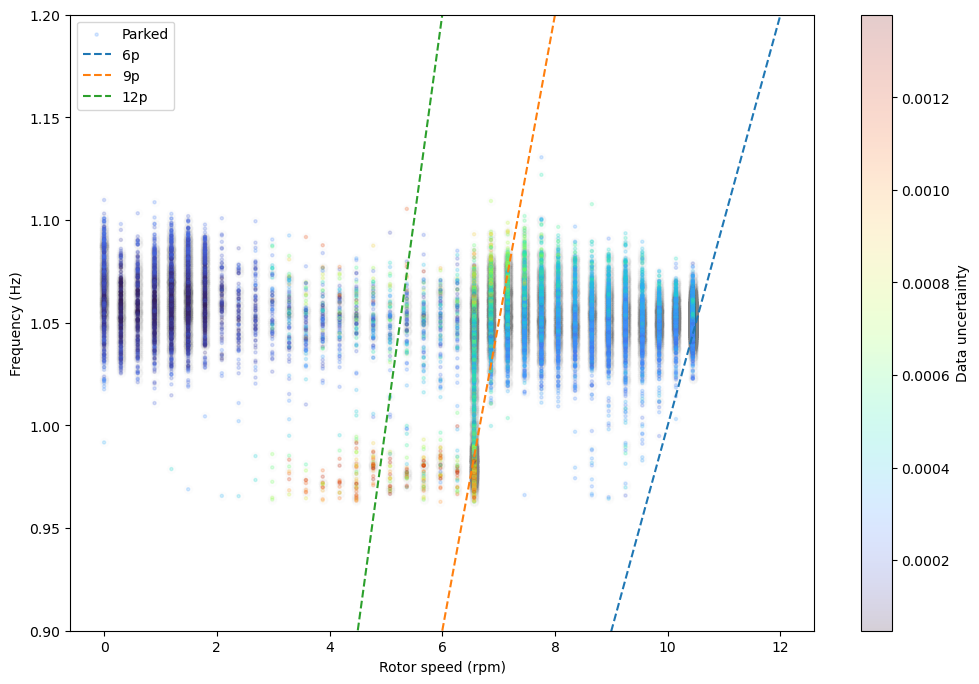

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(inputs_.filter(regex='rpm'), targets_, alpha=0.01, color='grey')
plt.scatter(inputs_.filter(regex='rpm'), targets_, alpha=0.2,s=5, label='Parked', c=preds_df['data'], cmap='turbo')
plt.colorbar(label='Data uncertainty')
x = np.linspace(0, 12, 1000)
plt.plot(x, 6*x/60, label= '6p', linestyle = '--')
plt.plot(x, 9*x/60, label= '9p', linestyle = '--')
plt.plot(x, 12*x/60, label= '12p', linestyle = '--')
plt.ylim(0.9, 1.2)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Rotor speed (rpm)')
plt.legend()


In [ ]:
X_train_transform

mean_NW2_D01_rpm  mean_NW2_D01_pitch  \
timestamp                                                         
2022-10-01 00:10:00+00:00            10.445              12.170   
2022-10-01 01:00:00+00:00            10.445               6.854   
2022-10-01 01:10:00+00:00            10.445               0.727   
2022-10-01 02:10:00+00:00            10.445              -1.511   
2022-10-01 03:20:00+00:00            10.445              -1.175   
...                                     ...                 ...   
2023-05-08 21:10:00+00:00             9.549               1.707   
2023-05-08 21:30:00+00:00            10.445              -1.315   
2023-05-08 21:40:00+00:00             9.251              -1.063   
2023-05-08 21:50:00+00:00             8.356               3.525   
2023-05-08 22:20:00+00:00             8.952               0.979   

                           mean_NW2_D01_power  mean_NW2_D01_windspeed  \
timestamp                                                               
2022-10-01 00:10:00+00:00            9523.392                  18.715   
2022-10-01 01:00:00+00:00            9524.865                  15.129   
2022-10-01 01:10:00+00:00            9487.233                  13.074   
2022-10-01 02:10:00+00:00            9206.081                  12.488   
2022-10-01 03:20:00+00:00            6176.576                  10.699   
...                                       ...                     ...   
2023-05-08 21:10:00+00:00            3727.232                  10.109   
2023-05-08 21:30:00+00:00            4448.000                  10.188   
2023-05-08 21:40:00+00:00            3015.616                   8.098   
2023-05-08 21:50:00+00:00            2394.752                   8.543   
2023-05-08 22:20:00+00:00            3071.104                   9.066   

                           sin_mean_NW2_D01_yaw  cos_mean_NW2_D01_yaw  \
timestamp                                                               
2022-10-01 00:10:00+00:00             -0.136303             -0.990667   
2022-10-01 01:00:00+00:00             -0.240787             -0.970578   
2022-10-01 01:10:00+00:00             -0.409031             -0.912520   
2022-10-01 02:10:00+00:00             -0.999937             -0.011222   
2022-10-01 03:20:00+00:00             -0.999382              0.035161   
...                                         ...                   ...   
2023-05-08 21:10:00+00:00             -0.545649             -0.838014   
2023-05-08 21:30:00+00:00             -0.465661             -0.884963   
2023-05-08 21:40:00+00:00             -0.373538             -0.927615   
2023-05-08 21:50:00+00:00             -0.383941             -0.923358   
2023-05-08 22:20:00+00:00             -0.322282             -0.946644   

                           sin_mean_NW2_D01_winddirection  \
timestamp                                                   
2022-10-01 00:10:00+00:00                       -0.147896   
2022-10-01 01:00:00+00:00                       -0.274278   
2022-10-01 01:10:00+00:00                       -0.455700   
2022-10-01 02:10:00+00:00                       -0.999799   
2022-10-01 03:20:00+00:00                       -0.999713   
...                                                   ...   
2023-05-08 21:10:00+00:00                       -0.564737   
2023-05-08 21:30:00+00:00                       -0.469117   
2023-05-08 21:40:00+00:00                       -0.356265   
2023-05-08 21:50:00+00:00                       -0.378972   
2023-05-08 22:20:00+00:00                       -0.310693   

                           cos_mean_NW2_D01_winddirection  \
timestamp                                                   
2022-10-01 00:10:00+00:00                       -0.989003   
2022-10-01 01:00:00+00:00                       -0.961650   
2022-10-01 01:10:00+00:00                       -0.890133   
2022-10-01 02:10:00+00:00                        0.020035   
2022-10-01 03:20:00+00:00                        0.023944   
...                               

In [ ]:
X_train_transform = X_train.copy()
transform_col = X_train_transform.filter(regex='rpm').columns[0]
X_train_transform[transform_col].iloc[int(len(X_train_transform)/2):] = 1e10

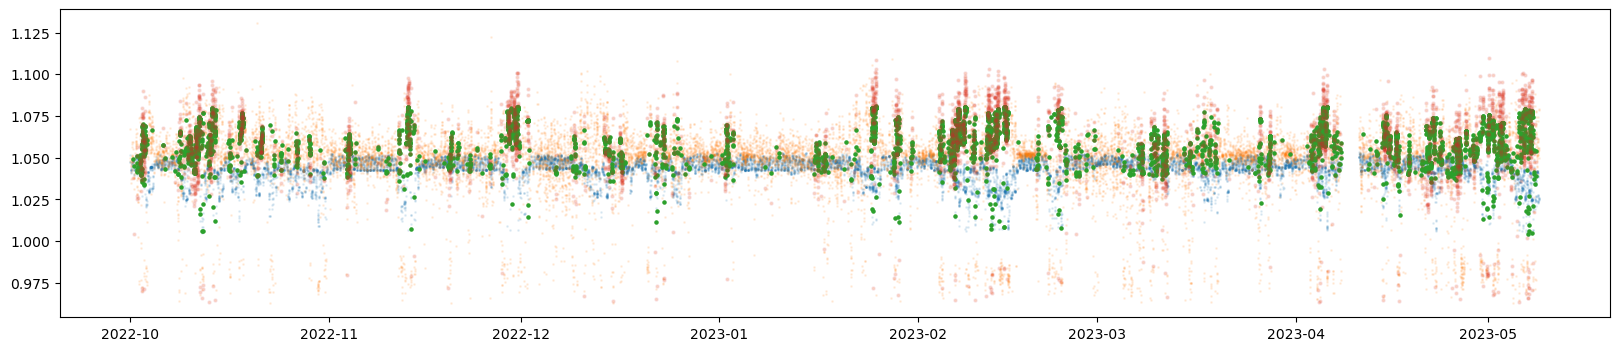

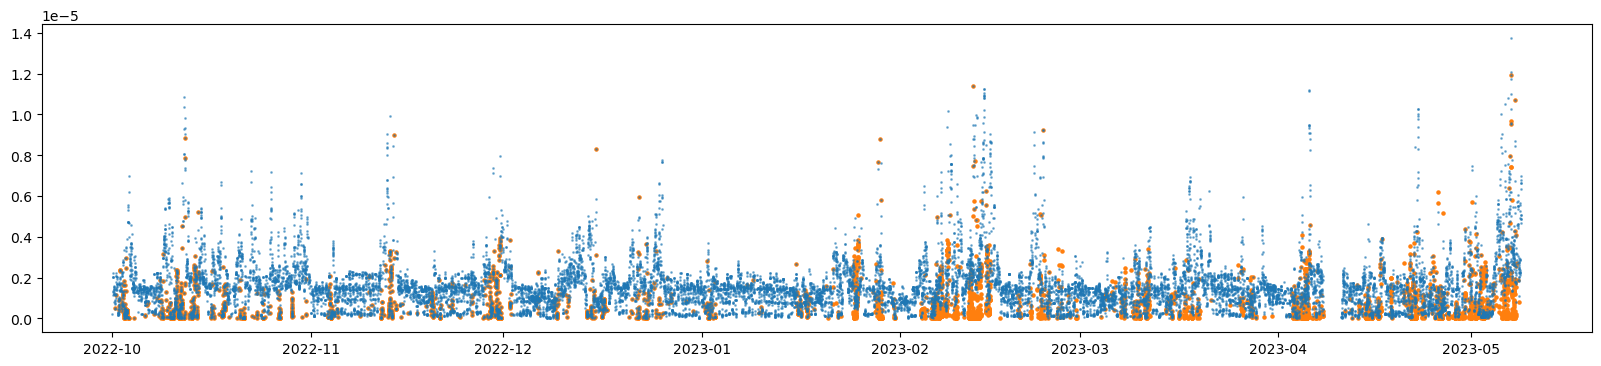

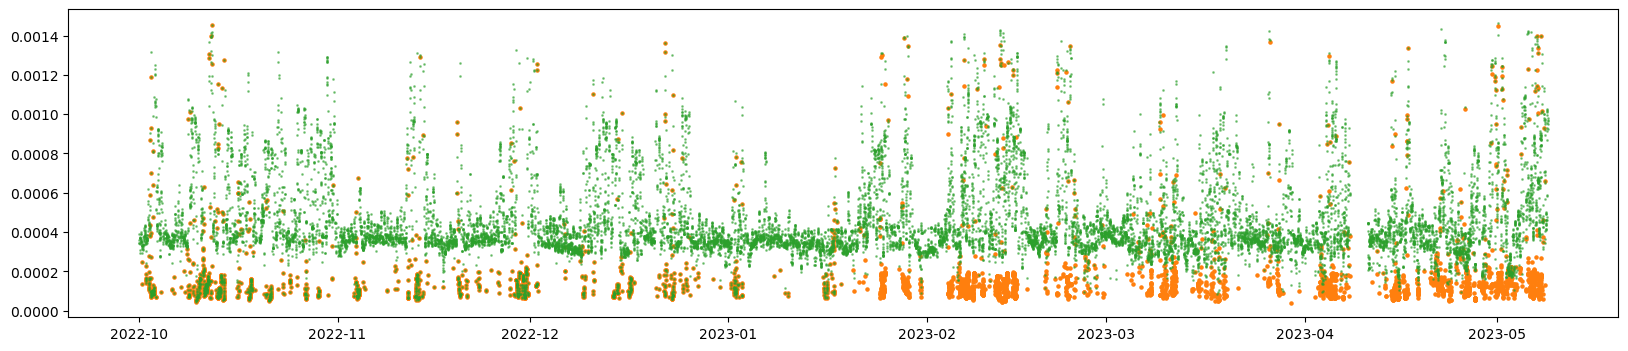

In [ ]:
inputs_ = X_train_transform[summary['selected_features_names']].dropna()
targets_ = y_train

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X_lowrpm_train, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=200)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X_lowrpm_train.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

plt.figure(figsize=(20,4))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
plt.scatter(parked_preds_df.index, parked_preds_df['mean'], label='parked predictions', s=5, alpha=1.0)
plt.scatter(y_lowrpm_train.index, y_lowrpm_train, label='parked', s=5, alpha=0.1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'],s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=0.5, color='tab:blue',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], s=5, alpha=1.0, color='tab:orange')
plt.scatter(preds_df['data'].index, preds_df['data'],s=1, alpha=0.5, color='tab:green')

plt.show()

In [ ]:
cb_regr

NameError: name 'cb_regr' is not defined

In [ ]:
import catboost
from catboost import *
import shap
shap.initjs()

explainer = shap.TreeExplainer(cb_regr)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=[30,20])

c:\Users\Max\anaconda3\envs\soiltwin\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Max\anaconda3\envs\soiltwin\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_

NameError: name 'cb_regr' is not defined

Text(0, 0.5, 'Rotor speed (rpm)')

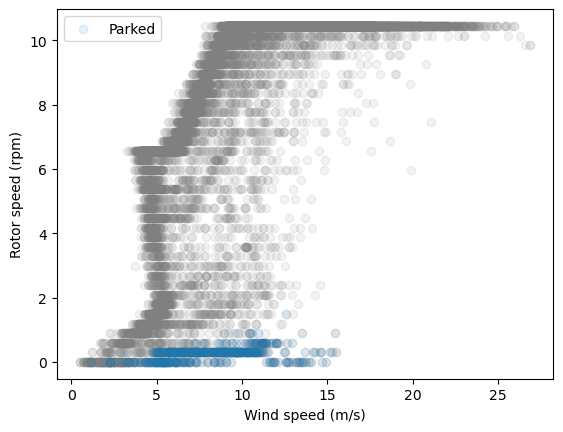

In [ ]:
plt.scatter(X.filter(regex='windspeed'), X.filter(regex='rpm'), alpha=0.1, color='grey')
plt.scatter(X_parked.filter(regex='windspeed'), X_parked.filter(regex='rpm'), alpha=0.1, label='Parked')
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rotor speed (rpm)')

# Belwind longterm

In [ ]:
start  = datetime.datetime(2012,1,1,tzinfo=utc)
stop  = datetime.datetime(2023,7,19,tzinfo=utc)

location = 'bbc01'
name_location = 'BB_C01'

home_folder = "../../"
data_file_name = '_'.join([location, start.strftime("%Y%m%d"), stop.strftime("%Y%m%d")])
data_path = home_folder + "data/bb/raw/" + data_file_name + ".parquet"
data = pd.read_parquet(data_path)


SS1 = get_frequencies(data, 'SS1')
SS2 = get_frequencies(data, 'SS2')
FA1 = get_frequencies(data, 'FA1')

In [ ]:
weather_data_path = "../../data/nw2/mvbc_data_longterm.parquet"
Thorntonbank_data_path = "../../data/nw2/Thorntonbank_data_longterm.parquet"
Westhinder_data_path = "../../data/nw2/Westhinder_data_longterm.parquet"

weather_data = pd.read_parquet(weather_data_path)

scada_inputs = data.filter(regex='mean')

inputs = \
    pd.concat(
        [
            weather_data,
            scada_inputs
        ],
        axis=1
    )

selected_columns = \
    [
       'Sea_water_temperature',
       'Wave_height',
       'Tide_TAW',
       'Average_wave_period',
       'Air_pressure',
       'Air_temperature',
       'mean_'+ name_location + '_rpm',
       'mean_'+ name_location + '_yaw',
       'mean_'+ name_location + '_pitch',
       'mean_'+ name_location + '_power',
       'mean_'+ name_location + '_windspeed',
       'mean_'+ name_location + '_winddirection'
    ]
inputs = inputs[selected_columns]

In [ ]:
parked_data = get_parked_data(data)
parked_SS2 = get_frequencies(parked_data, 'SS2')
days = parked_SS2.groupby(parked_SS2.index.date).count()[parked_SS2.groupby(parked_SS2.index.date).count() > 144*0.2].dropna().index
parked_SS2['date'] = parked_SS2.index.date
parked_SS2_longterm = parked_SS2[np.isin(parked_SS2['date'], days)].drop(columns=['date'])

In [ ]:
from sklearn.cluster import DBSCAN

time_difference = (parked_SS2_longterm.index-parked_SS2_longterm.index[0]).total_seconds()/60
parked_SS2_longterm['time_difference'] = time_difference
clustering = DBSCAN(eps=60*24*14, min_samples=2).fit(parked_SS2_longterm['time_difference'].values.reshape(-1, 1) )
parked_SS2_longterm['cluster'] = clustering.labels_

big_clusters = parked_SS2_longterm.groupby('cluster').count()[parked_SS2_longterm.groupby('cluster').count()>144].dropna().index
parked_SS2_longterm_big_clusters = parked_SS2_longterm[np.isin(parked_SS2_longterm['cluster'], big_clusters)]
unique_vals = parked_SS2_longterm_big_clusters['cluster'].unique()
parked_SS2_longterm_big_clusters['cluster'].replace(to_replace=unique_vals,
           value= list(range(len(unique_vals))), inplace=True)

C:\Users\Max\AppData\Local\Temp\ipykernel_25396\837523136.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# sklearn imports
from sklearn.model_selection import train_test_split

# oma_tracking imports
from oma_tracking.data.preprocessing import sin_cos_angle_inputs

random_state = 24
test_size = 0.2
angle_transformed_inputs = sin_cos_angle_inputs(inputs)
angle_columns = [angle for angle in inputs.columns if ('yaw' in angle or 'winddirection' in angle)]
angle_removed_inputs = inputs.drop(columns=angle_columns)

prediction_param = parked_SS2_longterm_big_clusters['mean_frequency'].copy()
y = prediction_param.dropna()
X = angle_transformed_inputs.loc[y.index].dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=test_size, random_state=random_state)


In [ ]:
cb_regr = CatBoostRegressor(random_seed=13, posterior_sampling=True, loss_function='RMSEWithUncertainty')
cb_regr.fit(X, y)

0:	learn: -2.2104944	total: 8.86ms	remaining: 8.85s
1:	learn: -2.2326508	total: 18.4ms	remaining: 9.17s
2:	learn: -2.2527924	total: 27.8ms	remaining: 9.24s
3:	learn: -2.2749146	total: 36.8ms	remaining: 9.15s
4:	learn: -2.2955303	total: 49.2ms	remaining: 9.8s
5:	learn: -2.3108361	total: 59.2ms	remaining: 9.81s
6:	learn: -2.3288262	total: 68.3ms	remaining: 9.69s
7:	learn: -2.3435629	total: 79.5ms	remaining: 9.85s
8:	learn: -2.3631264	total: 88.4ms	remaining: 9.73s
9:	learn: -2.3767967	total: 98.2ms	remaining: 9.72s
10:	learn: -2.3959320	total: 110ms	remaining: 9.85s
11:	learn: -2.4141215	total: 121ms	remaining: 9.93s
12:	learn: -2.4323622	total: 132ms	remaining: 10s
13:	learn: -2.4470240	total: 143ms	remaining: 10.1s
14:	learn: -2.4609332	total: 153ms	remaining: 10.1s
15:	learn: -2.4718840	total: 163ms	remaining: 10s
16:	learn: -2.4838630	total: 171ms	remaining: 9.9s
17:	learn: -2.4980776	total: 181ms	remaining: 9.88s
18:	learn: -2.5088692	total: 190ms	remaining: 9.83s
19:	learn: -2.5202

In [ ]:
inputs_ = angle_transformed_inputs.dropna()
targets_ = SS2

preds = cb_regr.virtual_ensembles_predict(inputs_, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=500)
preds_df = pd.DataFrame(preds, columns=['mean', 'knowledge', 'data'], index=inputs_.index)

mean_preds = preds[:,0] # mean values predicted by a virtual ensemble
knowledge = preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
data = preds[:,2] # average estimated data uncertainty

parked_preds = cb_regr.virtual_ensembles_predict(X, prediction_type='TotalUncertainty') #, virtual_ensembles_count=100, ntree_end=500)
parked_preds_df = pd.DataFrame(parked_preds, columns=['mean', 'knowledge', 'data'], index=X.index)

parked_mean_preds = parked_preds[:,0] # mean values predicted by a virtual ensemble
parked_knowledge = parked_preds[:,1] # knowledge uncertainty predicted by a virtual ensemble
parked_data = parked_preds[:,2] # average estimated data uncertainty

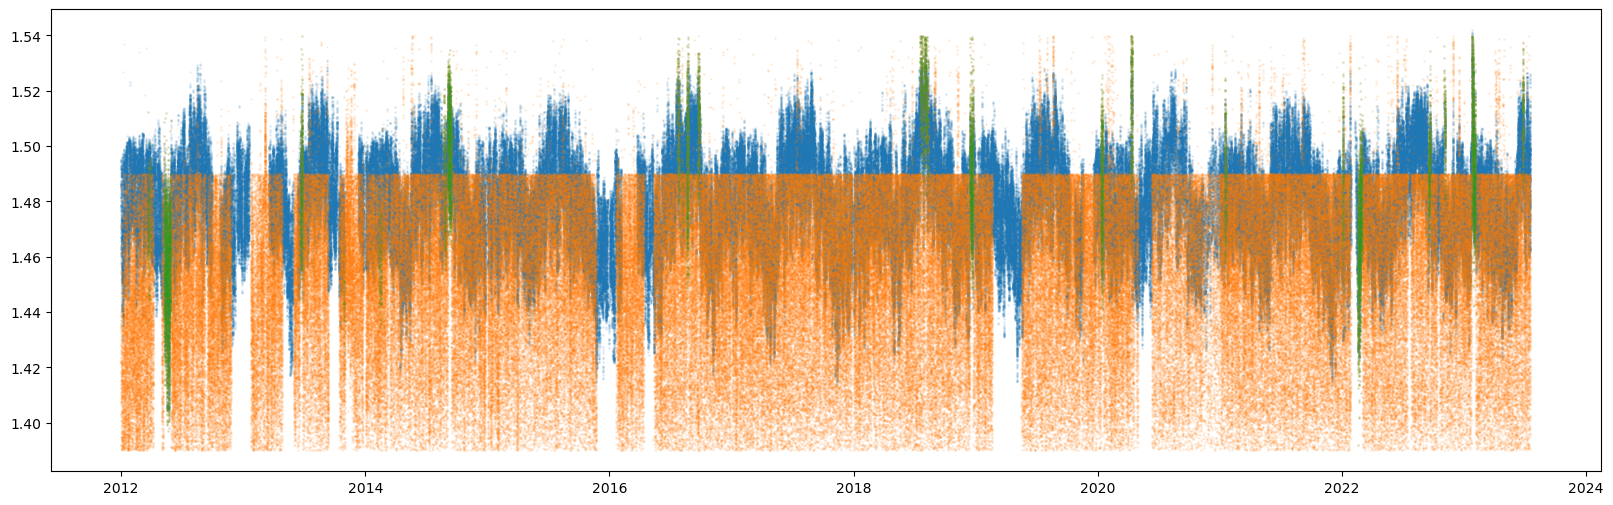

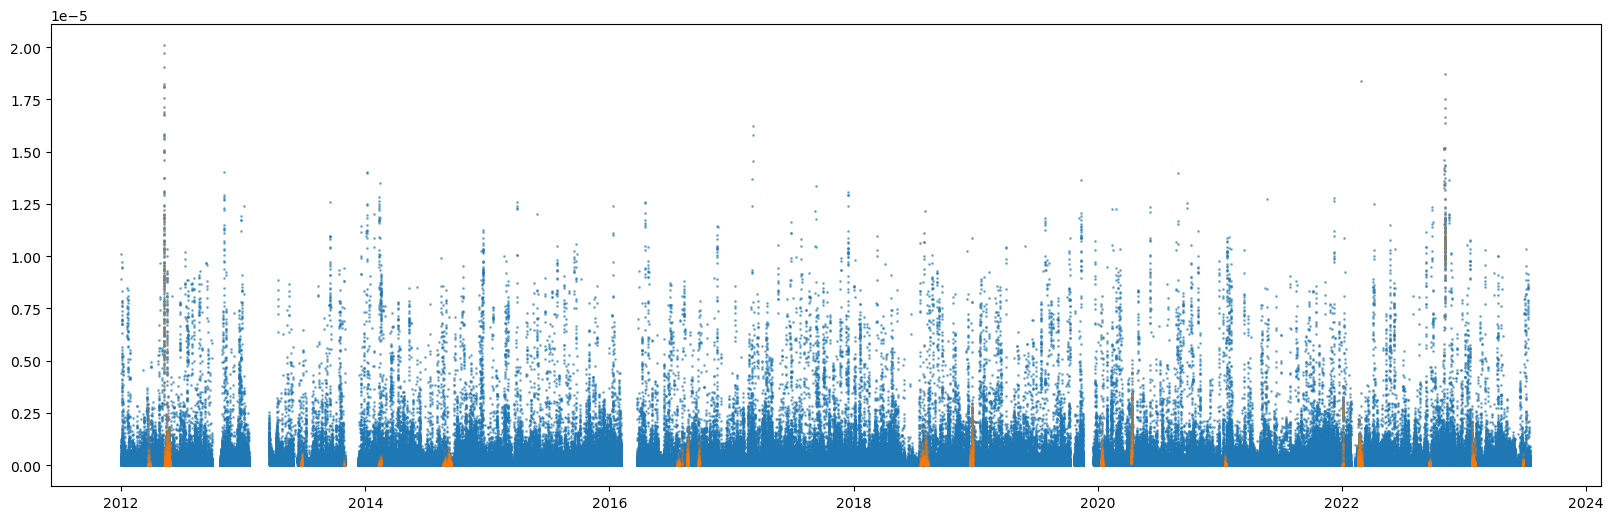

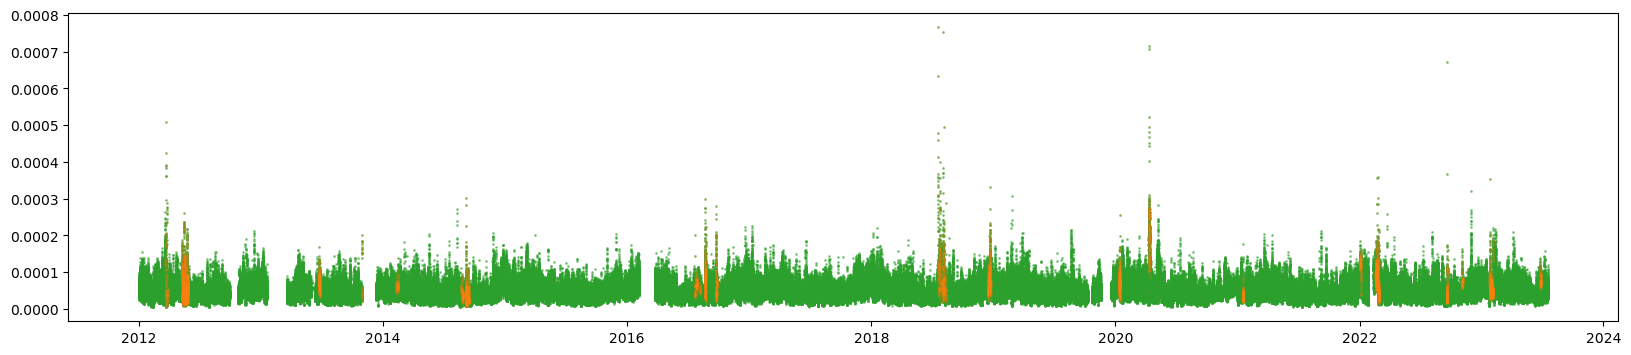

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(inputs_.index, mean_preds, label='predictions', s=1, alpha=0.1)
plt.scatter(targets_.index, targets_, label='actual', s=1, alpha=0.1)
plt.scatter(y.index, y, label='parked', s=1, alpha=0.1)
plt.show()
plt.figure(figsize=(20,6))
plt.scatter(preds_df['knowledge'].index, preds_df['knowledge'], alpha=1.0, color='tab:blue',s=1)
plt.scatter(parked_preds_df['knowledge'].index, parked_preds_df['knowledge'], alpha=0.1, color='tab:orange',s=1)
plt.show()
plt.figure(figsize=(20,4))
plt.scatter(preds_df['data'].index, preds_df['data'], alpha=1.0, color='tab:green',s=1)
plt.scatter(parked_preds_df['data'].index, parked_preds_df['data'], alpha=0.1, color='tab:orange',s=1)
plt.show()